![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
# Feature Selection

**Feature selection**, or, selecting which variables to use in your model, is an important task that can make a big difference in model performance. In general, methods for feature selection fall into three categories.

1. **Filter Methods**
1. **Wrapper Methods**
1. **Embedded Methods**

This lesson's agenda was heavily influenced by [this article posted to Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/).

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
X = np.random.randn(1000, 20)
b = np.random.randint(-10, 10, size=20).astype('float')
e = np.random.randn(1000) * 2

b[np.abs(b) <= 5] = 0

b[0] = 0.3
b[2] = -0.2
b[3] = 1.2
b[5] = -2.3

print(b)

y = X @ b + e

[  0.3  -8.   -0.2   1.2  -6.   -2.3   6.    0.    9.    6.    0.    0.
   0.   -8.    9.    0.    0.    0.  -10.    7. ]


## Filter Methods
![](imgs/panning.jpg)

**Filter methods** are essentially what we've been doing up until now. You use statistical techniques to determine whether or not an $x$-variable might impact $y$ before you even begin to think about modeling. For example, you might

* Look at a **correlation matrix** to determine whether or not quantitative variables impact your quantitative response.
* Carry out an **ANOVA analysis** to determine whether or not your categorical feature impacts your quantitative response. This can also be eye-balled with a **boxplot**.
* Carry out a **Chi-square analysis** to determine if your categorical feature impacts your categorical response. This may also be eye-balled by looking at **two-way tables** (ie, crosstabs).

Since we've already been making decisions based on our gut, and we don't focus very much on hypothesis tests, let's just move on to the next category.

---

## Wrapper Methods
![](imgs/wrapper.jpg)
_Editor's note: I had to settle for the second best candy (Twix) because I couldn't find an image of an empty wrapper for the best candy (Take 5)_

**Wrapper methods** are methods that attempt to find the best subset of features to use in a model based on evaluation that model until it is found. That's why they're also sometimes called **subset selection methods**. Here are a few:

---

### Best subset selection
This methods tests _all_ possible combinations of variables to use in the model, and selects the one that performs best on the test data. While this might _sound_ good, it is almost always infeasible since it involves fitting $2^p$ models. Got 20 variables? Good luck.

> Best subset selection is not implemented in scikit-learn.

---

### Stepwise regression
This method comes in two flavors: **forward** and **backward**. Backward stepwise regression fits the model using all features, and removes them one at a time until some stopping threshold is met. Usually, that's when your loss metric begins to drop off steeply. Forward stepwise gression is the same in reverse. It begins with the null model and includes variables one at a time until the model stops improving (according to some arbitrary threshold).

> Stepwise regression is not implemented in scikit-learn.

---

### Recursive Feature Elimination (RFE)
RFE is very similar to backwards stepwise regression. You begin by fitting the model on all predictors. Then, for each value $k = 1, ..., p$, fit the model on the most "important" $k$ features, where importance can be measured by coefficient magnitude (`coef_`) or feature importance (`feature_importance`).

Among each of the $p$ subsets, the variables of best performing model are selected. The key difference between this and backwards stepwise regression is that you have the entire array of models to choose from. This is why stepwise regression has sort of fallen out of fashion.

> RFE lives in `sklearn.feature_selection.RFE() and RFECV()`

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

In [4]:
for i, value in enumerate(b):
    print(f"Coef {i}: {value}")

Coef 0: 0.3
Coef 1: -8.0
Coef 2: -0.2
Coef 3: 1.2
Coef 4: -6.0
Coef 5: -2.3
Coef 6: 6.0
Coef 7: 0.0
Coef 8: 9.0
Coef 9: 6.0
Coef 10: 0.0
Coef 11: 0.0
Coef 12: 0.0
Coef 13: -8.0
Coef 14: 9.0
Coef 15: 0.0
Coef 16: 0.0
Coef 17: 0.0
Coef 18: -10.0
Coef 19: 7.0


In [5]:
lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True)
rfe = RFECV(estimator=lm, cv=kf)

In [6]:
rfe.fit(X, y)

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [7]:
X_rfe = rfe.transform(X)

In [8]:
X_rfe.shape

(1000, 13)

In [9]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True,  True])

In [10]:
lm.fit(X, y)
b_hat = lm.coef_

In [11]:
for i, (b_true, b_pred, incl) in enumerate(zip(b, b_hat, rfe.support_)):
    print(f"""
    Coef {i}:
        True: {b_true}
        Est : {b_pred}
        Incl: {incl}
    """)


    Coef 0:
        True: 0.3
        Est : 0.2805562711387049
        Incl: True
    

    Coef 1:
        True: -8.0
        Est : -7.966125537433868
        Incl: True
    

    Coef 2:
        True: -0.2
        Est : -0.2083253157516977
        Incl: True
    

    Coef 3:
        True: 1.2
        Est : 1.0383818803589326
        Incl: True
    

    Coef 4:
        True: -6.0
        Est : -5.963442292304101
        Incl: True
    

    Coef 5:
        True: -2.3
        Est : -2.2850659980679726
        Incl: True
    

    Coef 6:
        True: 6.0
        Est : 6.088872000730082
        Incl: True
    

    Coef 7:
        True: 0.0
        Est : 0.03120027165565402
        Incl: False
    

    Coef 8:
        True: 9.0
        Est : 8.893661487823282
        Incl: True
    

    Coef 9:
        True: 6.0
        Est : 6.0838483030036095
        Incl: True
    

    Coef 10:
        True: 0.0
        Est : 0.08357049751194442
        Incl: False
    

    Coef 11:
        T

## Embedded Methods
![](imgs/cake.jpg)

**Embedded methods** are methods where variable selection is a baked-in feature of the model. The most relevant example of this is with the **LASSO model**, but its driving force ($l_1$-regularization) can be found in other types of models, too.

---

### The LASSO (Least Absolute Shrinkage and Selection Operator)

**Pop quiz:** What is the value of $b$ that minimizes this expression:

$$ (y - b)^2 $$

How about now?

$$ (y - b)^2 + \lambda |b| $$

You _want_ to say it's $b = y$ again, but you can't. It depends on $\lambda$. That $\lambda > 0$ number is often called a penalty term, since it penalizes your minimization if $|b|$ is too large. We extend this to a situation involving actual data:

OLS:
$$\text{minimize} \space \frac{1}{n}\|\mathbf{y} - \mathbf{X}\beta\|^2$$

LASSO: 
$$\text{minimize} \space \frac{1}{n}\|\mathbf{y} - \mathbf{X}\beta\|^2 + \lambda \|\beta\|_1$$

The consequence of doing this is two-fold:

#### Shrinkage
For large values of $\lambda$, anything besides $\beta \approx 0$ incurs a large penalty. So, as $\lambda$ increases, $\beta$ shrinks. This has an affect of decreasing the variance of your model at the consequence of increasing bias.

#### Selection
This is a bit more complicated. Another way to write the above optimization problem is:


$\text{minimize} \space \frac{1}{n}\|\mathbf{y} - \mathbf{X}\beta\|^2$

$\text{such that} \space \|\beta\|_1 \le t$

This **constraint** takes on the shape of diamond in 2D space like this:

![](imgs/lasso.png)

Minimizing $\beta$ such that it lies within this diamond yields this famous picture:

![](imgs/lasso2.png)

Notice how, because of this shape, coordinates of $\beta$ are more likely to be "zeroed out". This effect occurs in $p > 2$ dimensions as well.

> The LASSO can be found in `sklearn.linear_model.Lasso()` and `LassoCV()`

In [12]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [26]:
kf = KFold(n_splits=5, shuffle=True)
ls = LassoCV(alphas=np.linspace(0.001, 0.1, 1000), cv=kf)
ls.fit(X_sc, y)

LassoCV(alphas=array([0.001 , 0.0011, ..., 0.0999, 0.1   ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=None, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [27]:
ls.mse_path_

array([[4.18915511, 4.81615533, 5.14608433, 4.93916329, 4.08406623],
       [4.18897047, 4.81610749, 5.14580665, 4.93881407, 4.08380998],
       [4.18878563, 4.81604722, 5.14553351, 4.93841551, 4.08354629],
       ...,
       [4.12942433, 4.94904621, 5.05371123, 4.68291417, 3.9616265 ],
       [4.12934559, 4.94937179, 5.05382794, 4.68283868, 3.96161151],
       [4.12926722, 4.94969786, 5.05394505, 4.68276356, 3.961597  ]])

In [28]:
mses = np.mean(ls.mse_path_, axis=1)

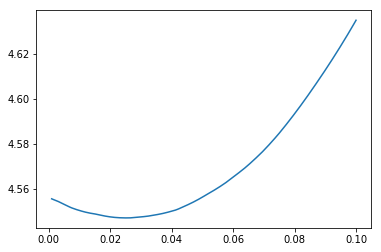

In [29]:
plt.plot(ls.alphas_, mses)

In [ ]:
np.round(ls.coef_, 2)

In [30]:
ls.alpha_

0.02537837837837838

In [19]:
for i, (b_true, b_ols, b_lasso) in enumerate(zip(b, b_hat, ls.coef_)):
    print(f"""
    Coef {i}:
        TRUTH: {b_true}
        OLS  : {b_ols}
        LASSO: {b_lasso}
    """)


    Coef 0:
        TRUTH: 0.3
        OLS  : 0.2805562711387049
        LASSO: 0.2529169217754257
    

    Coef 1:
        TRUTH: -8.0
        OLS  : -7.966125537433868
        LASSO: -7.926450335051412
    

    Coef 2:
        TRUTH: -0.2
        OLS  : -0.2083253157516977
        LASSO: -0.18184113521468576
    

    Coef 3:
        TRUTH: 1.2
        OLS  : 1.0383818803589326
        LASSO: 0.9868472857016065
    

    Coef 4:
        TRUTH: -6.0
        OLS  : -5.963442292304101
        LASSO: -5.925645431392789
    

    Coef 5:
        TRUTH: -2.3
        OLS  : -2.2850659980679726
        LASSO: -2.2148499439150915
    

    Coef 6:
        TRUTH: 6.0
        OLS  : 6.088872000730082
        LASSO: 5.923659848102329
    

    Coef 7:
        TRUTH: 0.0
        OLS  : 0.03120027165565402
        LASSO: 0.0
    

    Coef 8:
        TRUTH: 9.0
        OLS  : 8.893661487823282
        LASSO: 9.10461998599579
    

    Coef 9:
        TRUTH: 6.0
        OLS  : 6.0838483030036095

In [20]:
ls.predict(X_sc)

array([ 3.30124523e+01, -2.33105056e+01,  2.01457283e+01,  3.27051533e+00,
        2.42148383e+01,  8.27216704e-01,  1.56120879e+01, -1.71580699e+01,
        1.21605985e+01,  2.33833299e+00, -2.03270173e+01, -5.89667420e+00,
       -4.41170884e+00,  5.26446552e+00,  1.21790388e+01,  4.49584801e+01,
        2.38583376e+01, -2.62779622e+01,  4.51892119e+01, -1.35820460e+01,
       -3.87336741e+01, -1.53916212e+01,  3.39487508e+01, -1.17808512e+01,
        3.64906019e+00,  1.62051525e+01,  3.56344925e+01,  4.84419557e+01,
       -9.54758896e+00, -3.99349397e+00, -2.01811682e+01,  1.71684834e+01,
       -3.96526443e+01, -4.52484938e+00,  1.75313176e+01, -2.89851788e+01,
        2.42483885e+01,  3.51389874e+00, -1.68231092e+01,  1.64829431e+00,
        3.07063718e+01, -2.23438474e+00, -2.68853345e+01, -1.37920738e-01,
       -4.28199435e+01,  2.54773673e+01, -3.69537774e+00, -4.37359157e+00,
        2.40479777e+01,  4.37235202e+00,  5.44652274e+01,  7.75779435e+00,
        2.90356365e+01,  

In [31]:
from sklearn.pipeline import Pipeline

In [37]:
kf = KFold(n_splits=5, shuffle=True)
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rfe', RFECV(estimator=LinearRegression(), cv=kf)),
    ('lm', LinearRegression())
])

In [38]:
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe', RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [39]:
pipe.predict(X)

array([ 3.32780309e+01, -2.33540443e+01,  2.03371441e+01,  3.32680057e+00,
        2.42534225e+01,  8.86095517e-01,  1.57602096e+01, -1.71377406e+01,
        1.21180029e+01,  2.25267779e+00, -2.02242053e+01, -6.00936910e+00,
       -4.47612202e+00,  5.11541556e+00,  1.22229408e+01,  4.50492638e+01,
        2.38260582e+01, -2.64909880e+01,  4.53959779e+01, -1.35669426e+01,
       -3.90159571e+01, -1.56316256e+01,  3.41465016e+01, -1.18622503e+01,
        3.67762359e+00,  1.61466057e+01,  3.58324614e+01,  4.88253674e+01,
       -9.68528273e+00, -3.94414405e+00, -2.03189478e+01,  1.72184581e+01,
       -3.99230412e+01, -4.48033420e+00,  1.78000118e+01, -2.89830116e+01,
        2.41733932e+01,  3.49065969e+00, -1.67628479e+01,  1.80046856e+00,
        3.09610674e+01, -2.26495884e+00, -2.71029459e+01, -2.15122906e-01,
       -4.29553313e+01,  2.55193709e+01, -3.81910117e+00, -4.32515105e+00,
        2.41496172e+01,  4.41542491e+00,  5.47180779e+01,  7.66721416e+00,
        2.92146371e+01,  